## Import Basic Packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Dataset for California Housing

In [22]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [23]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [24]:
## Check the Description of the Dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [25]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [26]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [27]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Prepare the Dataset

In [28]:
dataset = pd.DataFrame(housing.data,columns=housing.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
dataset['Price'] = housing.target
df = dataset

In [30]:
dataset.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [32]:
##Summarize the Stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [33]:
## Check Missing Values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

## EDA (Exploratory Data Analysis)

In [34]:
## Correlation (co-related for independent features and output features) -- then to perform highly or lowly to perform model performance

In [35]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [36]:
import matplotlib
print(matplotlib.get_backend())

inline


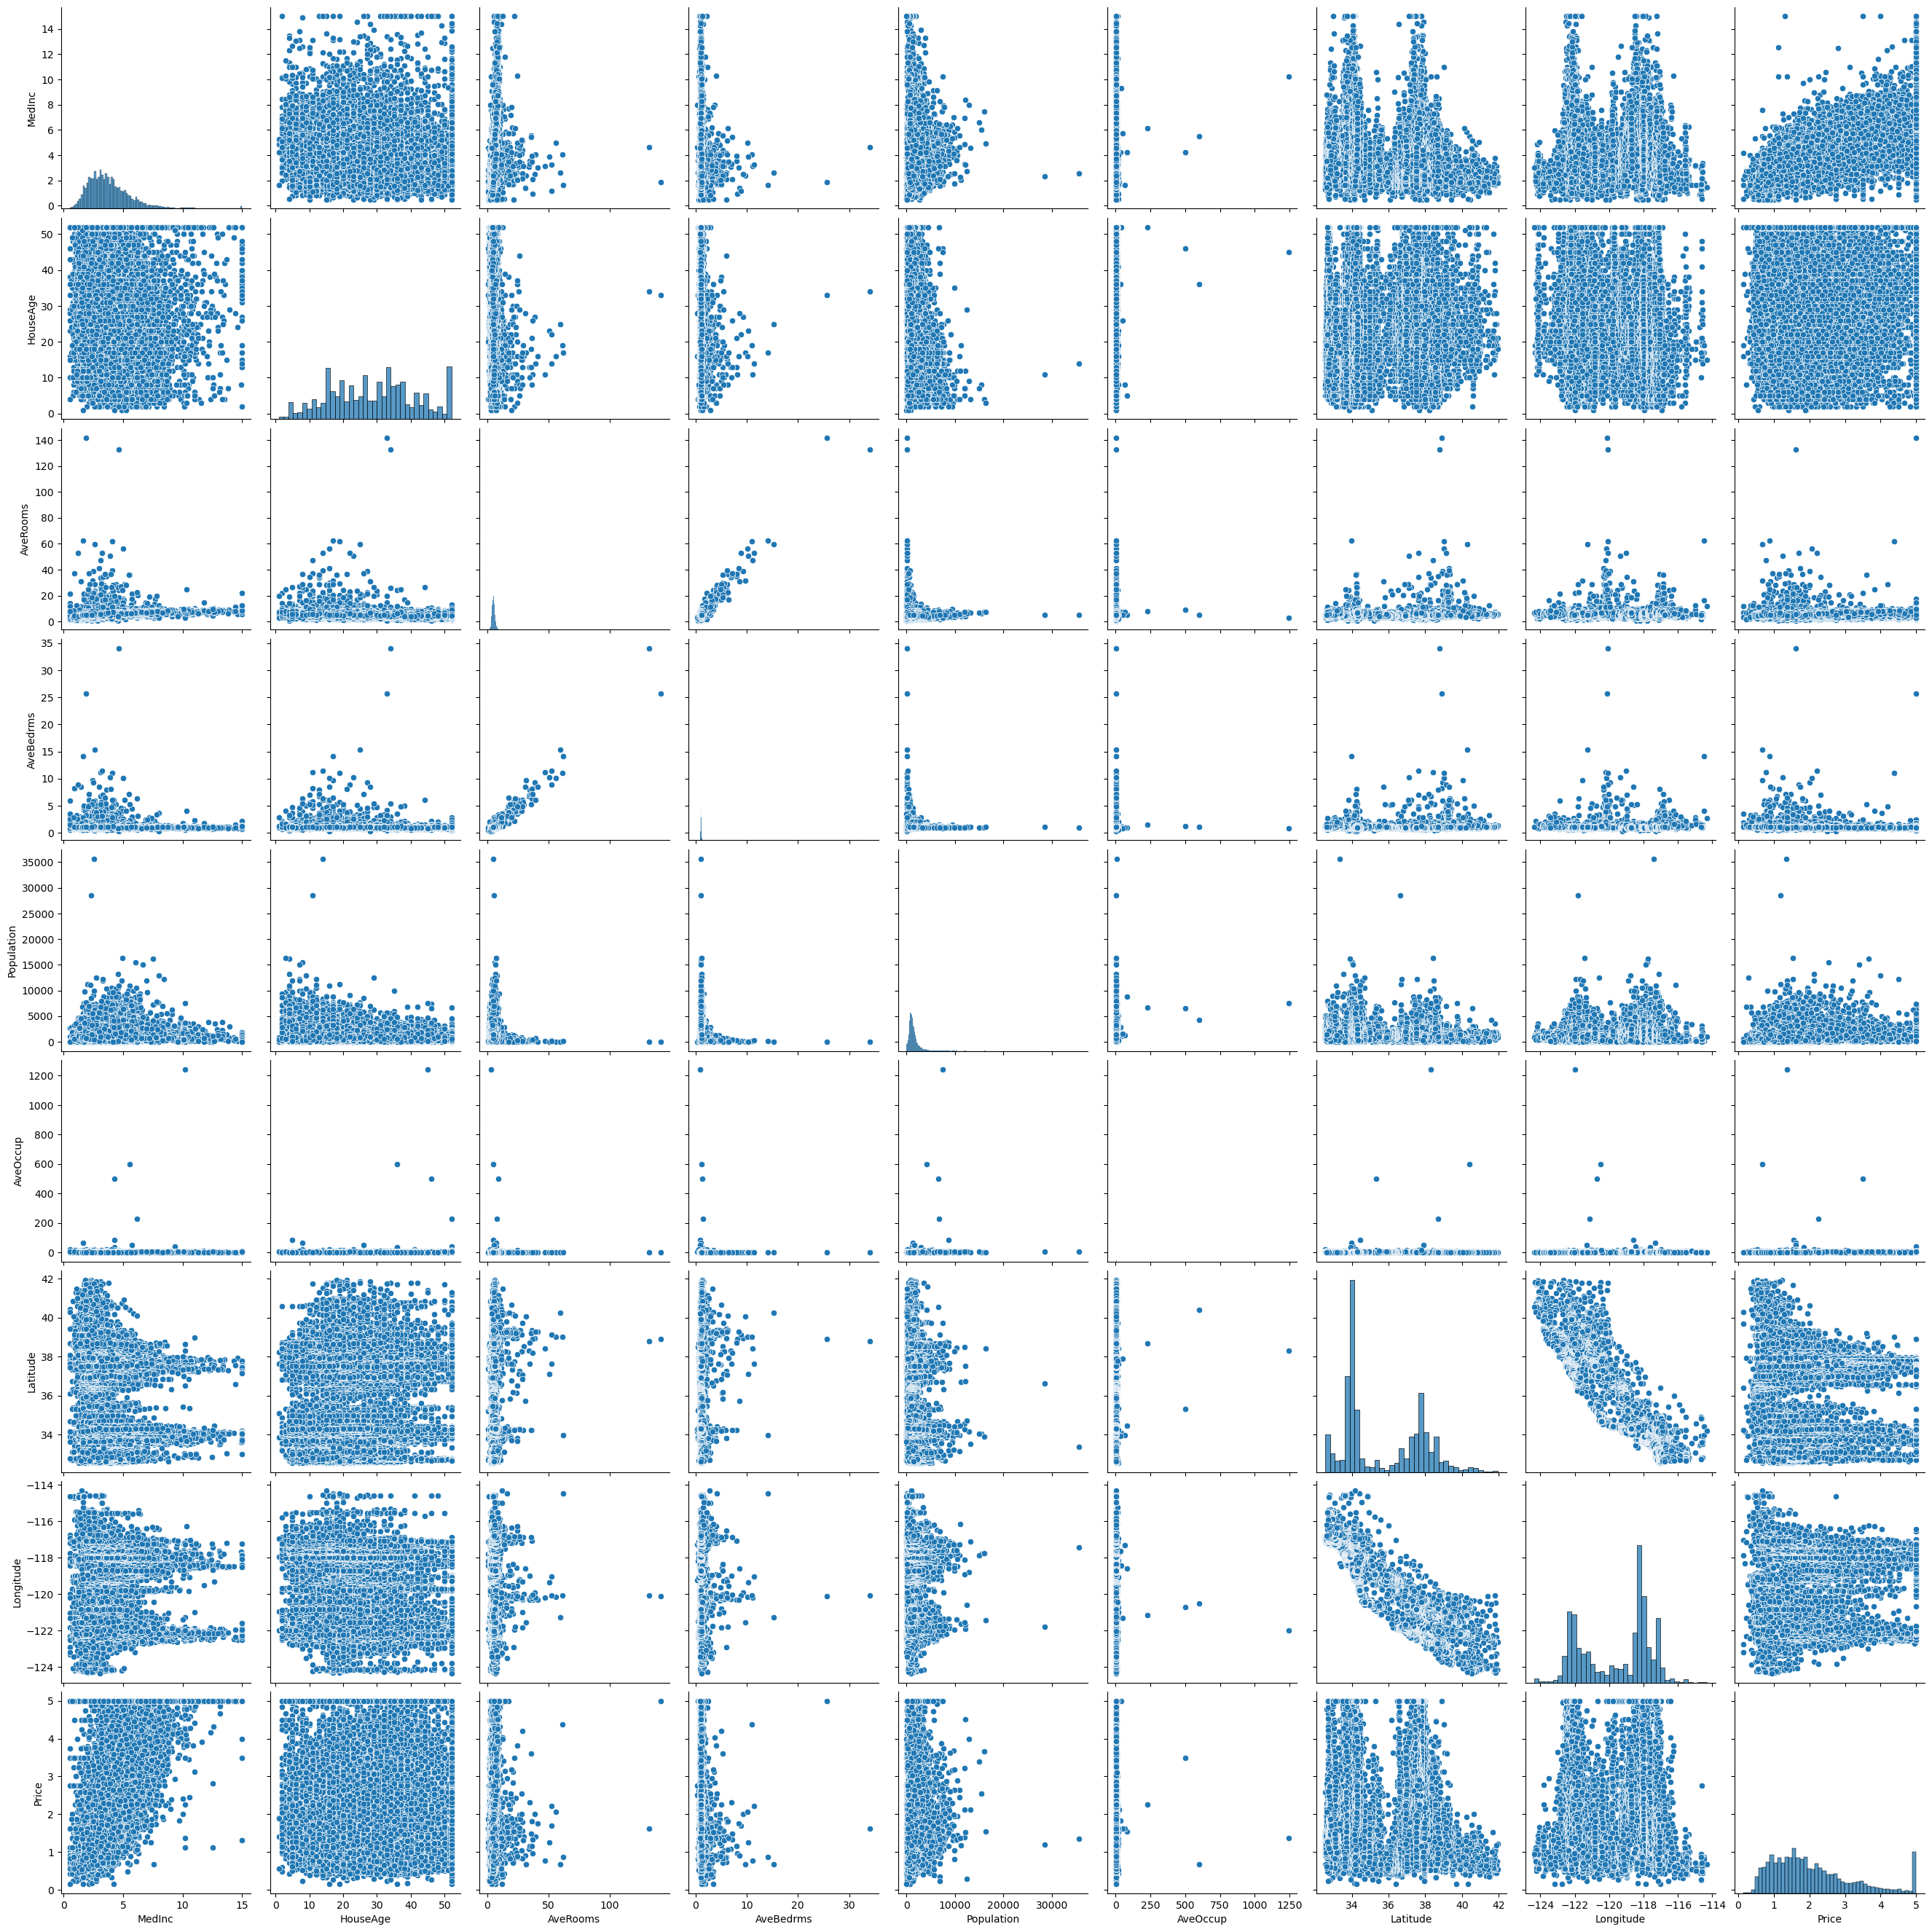

In [38]:
import seaborn as sns
sns.pairplot(df, height=3)
plt.show()

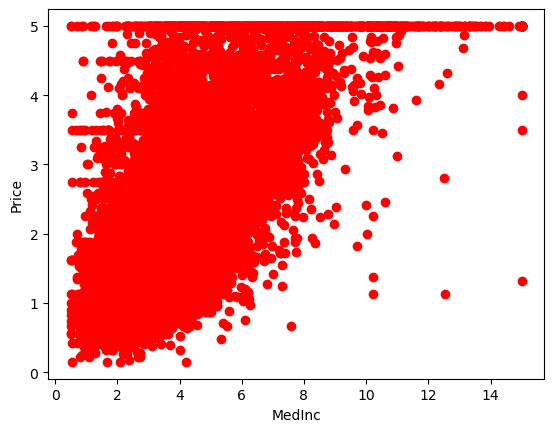

In [39]:
plt.scatter(df['MedInc'],df['Price'],c='red')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.show() 

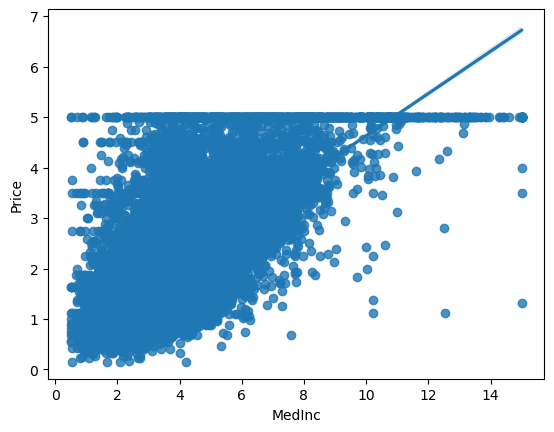

In [40]:
sns.regplot(x="MedInc", y="Price" ,data=dataset)
plt.show()

In [41]:
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


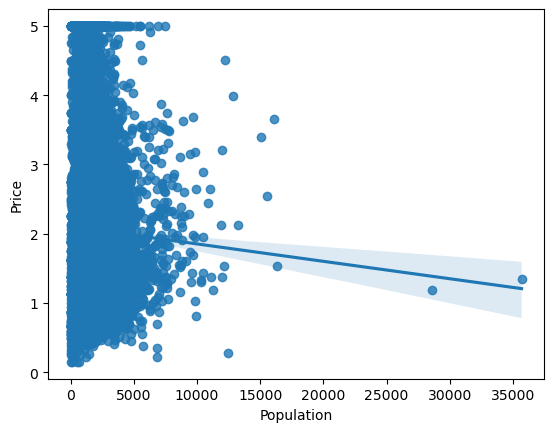

In [42]:
sns.regplot(x="Population", y="Price" ,data=dataset)
plt.show()

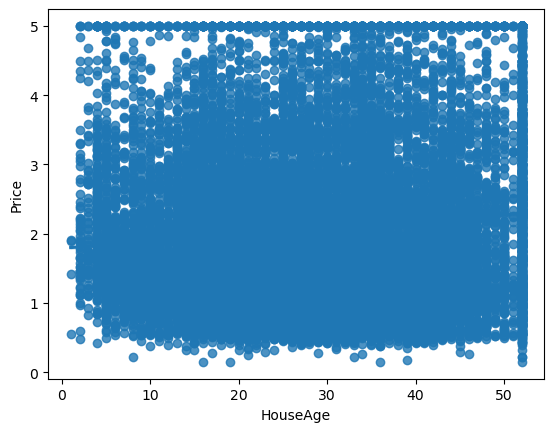

In [43]:
sns.regplot(x="HouseAge", y="Price" ,data=dataset)
plt.show()

In [44]:
## Independent and Dependent Features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
X.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23


In [46]:
y.head(1)

0    4.526
Name: Price, dtype: float64

In [47]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [48]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [49]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


In [50]:
## Standardize the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

In [54]:
X_test = scaler.fit_transform(X_test)

## Model Evalution

In [55]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [56]:
regression.fit(X_train,y_train)

LinearRegression()

In [57]:
## Coefficient
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [58]:
print(regression.intercept_)

2.0692396089424143


In [59]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Prediction with Test Data

In [106]:
regression_pred = regression.predict(X_test)

In [63]:
regression_pred

array([0.70074765, 1.75651603, 2.73363614, ..., 2.08473667, 1.56199123,
       1.83521508])

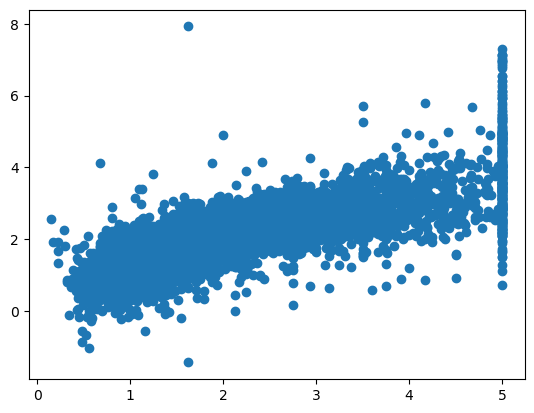

In [64]:
## Plot the Scatter plot for the prediction -- Values Like Increase it's format for Linear type
plt.scatter(y_test,regression_pred)
plt.show()

In [65]:
## error
residuals = y_test-regression_pred

In [66]:
residuals

20046   -0.223748
3024    -1.298516
15663    2.266374
20484   -0.656792
9814     0.153351
           ...   
17505    0.139354
13512   -0.207369
10842    0.099263
16559   -0.367991
5786     0.262785
Name: Price, Length: 6192, dtype: float64

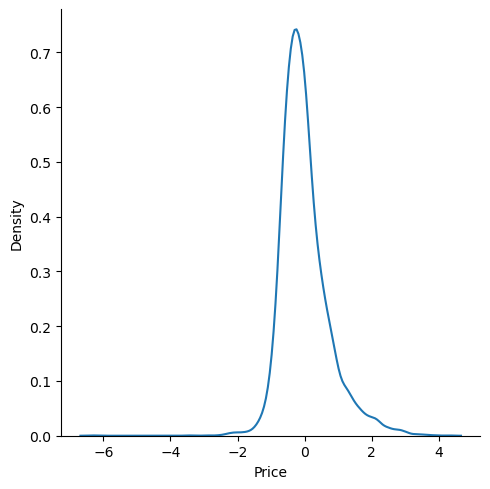

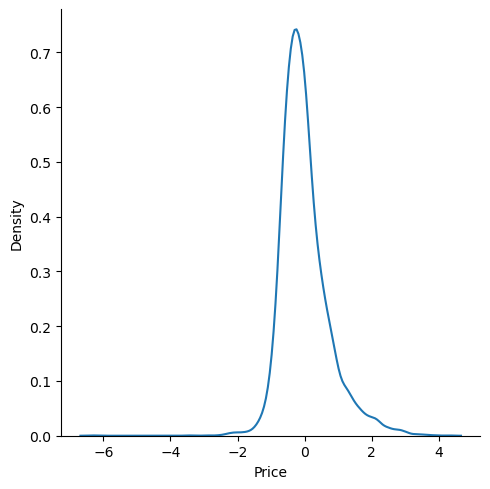

In [68]:
## Plot this residuals - Normal Distribution - Model Performing Wheel
sns.displot(residuals,kind="kde")
plt.show()

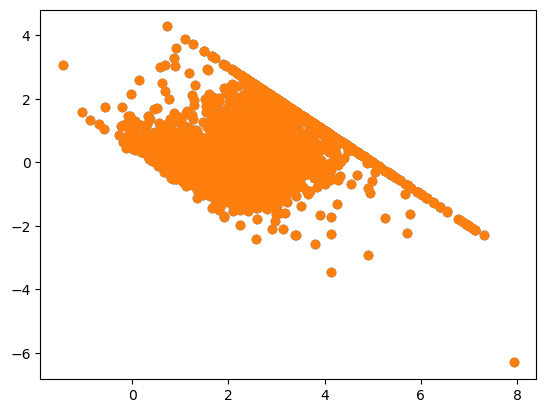

In [70]:
## Scatter plot with respect to prediction and residuals -- Uniform Distribution
plt.scatter(regression_pred,residuals)
plt.show()

## mean_squared_error, mean_absolute_error

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [77]:
print("Mean Absolute Error:",mean_absolute_error(y_test,regression_pred))
print("Mean Squared Error:",mean_squared_error(y_test,regression_pred))
print("Root of Mean Squared Error",np.sqrt(mean_squared_error(y_test,regression_pred)))

Mean Absolute Error: 0.5238759626552129
Mean Squared Error: 0.5165967398485735
Root of Mean Squared Error 0.7187466451042213


## R square and Adjusted R square

In [80]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_pred)
score

0.6064145112418659

In [83]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.605905262671582

## New Data Prediction

In [92]:
housing.data[0].reshape(1,-1)

In [96]:
## Transformation of new data
new_data = scaler.transform(housing.data[0].reshape(1,-1))
new_data

C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.36730311,  0.97542743,  0.62520012, -0.13139628, -0.98531614,
        -0.26453569,  1.07314583, -1.34389976]])

In [97]:
regression.predict(new_data)

array([4.18565815])

## Pickle the model for Deployment

In [101]:
import pickle
pickle.dump(regression,open('house_regmode.pkl','wb'))

In [104]:
## Build Pickle model to predict
pickled_model = pickle.load(open('house_regmode.pkl','rb'))

In [105]:
pickled_model.predict(new_data)

array([4.18565815])